# Computation of voltage divider

It could happen that the mains voltage fluctuates because of voltage collapses. Nevertheless, the resulting signal has to be stable enough so that the fluctuations don't influence the final result. A usual voltage divider with 2 resistors wouldn't achieve that. Therefore, adding an additional source from the microcontroller and resistor will make the signal more resistant to voltage flucutations. Furthermore, the microcontroller can only "read" positive voltages. The additional DC voltage source lifts the sine to an only positive range. 

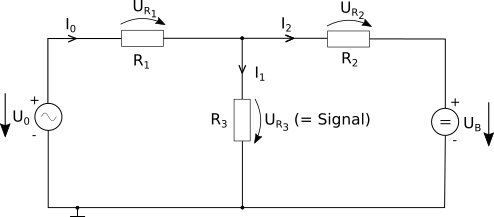

In [1]:
from IPython.display import Image
Image(filename='circuit.png') 

In [2]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import HTML, display

In [3]:
# For tables

def tableit(data):
    display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
            )
     ))


In [4]:
U0 = 17.1  # mains voltage in Volt (transformed from 230 V ~ to 9 V ~)
U_B = 5 # DC voltage from an external supply in Volts
R1 = 10000 # Ohm
R2 = 2400 # Ohm
R3 = 3000  # Ohm
f = 50 # Hertz
fs = 44100 # Hertz
duration = 0.06 # Duration of plots in seconds

In [5]:
t = np.arange(0, duration, 1 / fs)

## Currents

$$I_1 = \frac{U_0R_2sin(2\pi f t) + U_BR_1}{R_1(R_2+R_3)+R_2R_3}$$

$$I_2 = \frac{U_0R_3sin(2\pi f t) - U_B(R_1+R_3)}{R_1(R_2+R_3)+R_2R_3}$$

$$I_0 = I_1 + I_2$$

In [6]:
I1 = (U0 * np.sin(2 * np.pi * f * t) * R2 + U_B * R1) / (R1 * (R2 + R3) + R2 * R3)
I2 = (U0 * np.sin(2 * np.pi * f * t) * R3 - U_B * (R1 + R3)) / (R1 * (R2 + R3) + R2 * R3)
I0 = I1 + I2

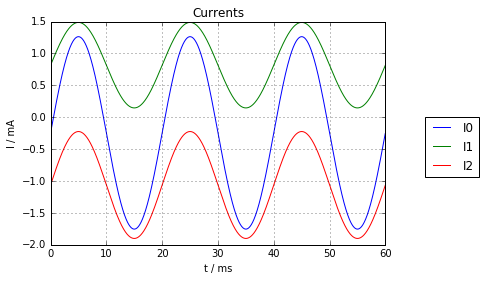

In [7]:
plt.plot(t * 1000, I0 * 1000, label="I0")
plt.plot(t * 1000, I1 * 1000, label="I1")
plt.plot(t * 1000, I2 * 1000, label="I2")
plt.title("Currents")
plt.ylabel("I / mA")
plt.xlabel("t / ms")
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.6))
plt.grid()
plt.show()

## Voltages

$$U_{R_1}=I_0R_1$$

$$U_{R_2}=I_2R_2$$

$$U_{R_3}=I_1R_3$$

In [8]:
U_R1 = I0 * R1
U_R2 = I2 * R2
U_R3 = I1 * R3
signal = U_R3 # U_R3 == signal voltage 

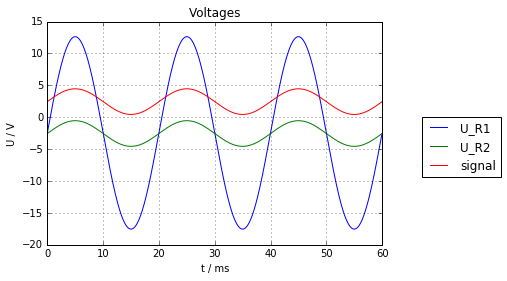

In [9]:
plt.plot(t * 1000, U_R1, label="U_R1")
plt.plot(t * 1000, U_R2, label="U_R2")
plt.plot(t * 1000, signal, label="signal")
plt.title("Voltages")
plt.ylabel("U / V")
plt.xlabel("t / ms")
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.6))
plt.grid()
plt.show()

## Offset of signal voltage

In [10]:
signal_max = np.max(signal)
signal_min = np.min(signal)

In [11]:
signal_pp = signal_max - signal_min

In [12]:
offset = (signal_max + signal_min) / 2

In [13]:
tableit([["signal_max / V", "signal_min / V","signal_pp / V", "Offset / V"],
         [np.around(signal_max, 2), np.around(signal_min, 2), np.around(signal_pp, 2), np.around(offset, 2)],
         ])

signal_max / V,signal_min / V,signal_pp / V,Offset / V
4.46,0.44,4.02,2.45


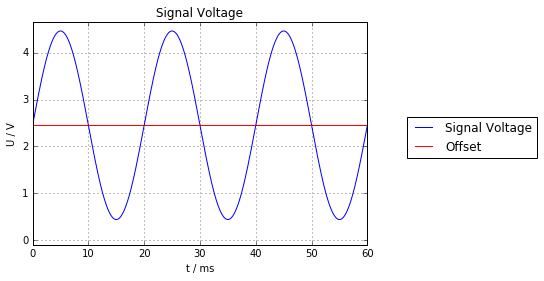

In [14]:
plt.plot(t * 1000, signal, label="Signal Voltage")
plt.title("Signal Voltage")
plt.ylabel("U / V")
plt.xlabel("t / ms")
plt.axhline(y=offset, color='r', linestyle='-', label='Offset')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.6))
plt.ylim(-0.1, signal_max + 0.2)
plt.grid()
plt.show()

## Dependency of signal voltage on the mains voltage

In [15]:
voltage_range = np.arange(U0 - 8, U0 + 8 ,0.1) # mains voltage fluctuations
I1_DC = (voltage_range * R2 + U_B * R1) / (R1 * (R3 + R2) + R3 * R2)
signal_DC = I1_DC * R3

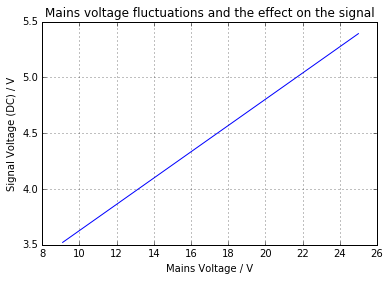

In [16]:
plt.plot(voltage_range, signal_DC)
plt.title('Mains voltage fluctuations and the effect on the signal')
plt.xlabel('Mains Voltage / V')
plt.ylabel('Signal Voltage (DC) / V')
plt.grid()
plt.show()

### Evaluation

The computation shows a good stability of the signal voltage if the mains voltage fluctuates. A change of 1V in the mains voltage results just in an approx. 100mV deviation of the signal.  

# Schmitt Trigger

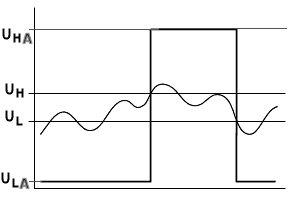

In [17]:
Image(filename='schmitt.png') 

Source: http://www.mikrocontroller.net/articles/Schmitt-Trigger

## Laws

- 1) If U_e (= input voltage) exceeds U_H, then U_a (= output voltage) = HIGH
- 2) If U_e comes below U_L, then U_a = LOW
- 3) If the range of Ue is between U_L and U_H, then U_a = const.
- 4) The transition from LOW to HiGH or rather from HIGH to LOW has always a steep edge

# Computation of a non-inverting Schmitt Trigger

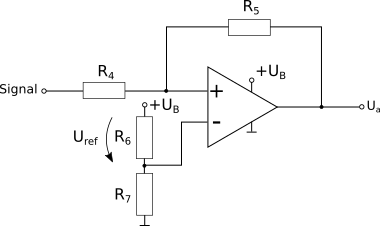

In [18]:
Image(filename='schmitt_drawing.png') 

In [19]:
R4 = 10000 # Ohm
R5 = 34800 # Ohm
R6 = 10000 # Ohm
R7 = 10000 # Ohm
U_aH = U_B
U_aL = 0

$$U_{High} = \frac{\frac{R_4}{R_4 + R_5} U_{a_L} - U_{ref}} {\frac{R_4}{R_4 + R_5} -1} $$

$$U_{Low} = \frac{\frac{R_4}{R_4 + R_5}U_{a_H} - U_{ref}} {\frac{R_4}{R_4 + R_5} -1} $$

$$U_{ref} = U_B \frac{R_6}{R_6 + R_7}$$

### Voltage Divider

In [20]:
U_ref = U_B * R6 / (R6 + R7)

### Turn-on Threshold 

In [21]:
U_High = (R4 / (R4 + R5) * U_aL - U_ref) / (R4 / (R4 + R5) -1)

### Turn-off Threshold

In [22]:
U_Low = (R4 / (R4 + R5) * U_aH - U_ref) / (R4 / (R4 + R5) -1)

In [23]:
tableit([["U_ref / V", "U_Low / V","U_High / V"],
         [U_ref, np.around(U_Low, 2), np.around(U_High, 2)],
         ])

U_ref / V,U_Low / V,U_High / V
2.5,1.78,3.22


## Hysteresis of a non-inverting Schmitt Trigger

In [24]:
def hyst(x, th_lo, th_hi, initial = False):
    hi = x >= th_hi
    lo_or_hi = (x <= th_lo) | hi
    ind = np.nonzero(lo_or_hi)[0]
    if not ind.size: # prevent index error if ind is empty
        return np.zeros_like(x, dtype=bool) | initial
    cnt = np.cumsum(lo_or_hi) # from 0 to len(x)
    return np.where(cnt, hi[ind[cnt-1]], initial)

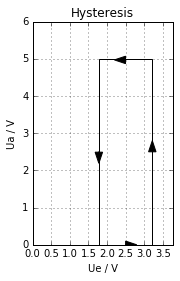

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(patches.Rectangle((U_Low, 0), U_High - U_Low, U_B, fill=False))
ax.set_title('Hysteresis')
ax.set_xlim([0,U_Low + 2]);
ax.set_ylim([0, U_B + 1]);
ax.set_xlabel('Ue / V')
ax.set_ylabel('Ua / V')
ax.arrow(U_High, U_B / 2 , 0, 0, head_width=0.2, head_length=0.3, fc='k', ec='k')
ax.arrow(U_Low, U_B / 2 , 0, -0.01, head_width=0.2, head_length=0.3, fc='k', ec='k')
ax.arrow((U_High + U_Low) / 2, U_B - 0.03 , -0.001, 0, head_width=0.2, head_length=0.3, fc='k', ec='k')
ax.arrow((U_High + U_Low) / 2, 0 , 0.001, 0, head_width=0.2, head_length=0.3, fc='k', ec='k')
plt.grid()
plt.show()

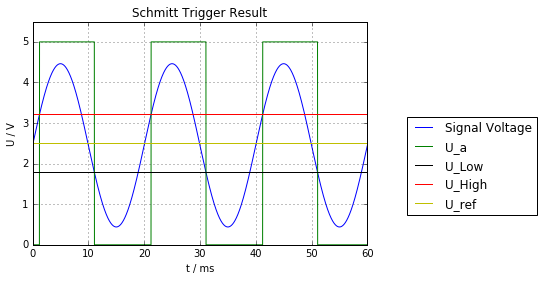

In [26]:
h1 = hyst(signal, U_Low, U_High)
plt.plot(t * 1000, signal, label='Signal Voltage')
plt.plot(t * 1000, U_B * h1, label='U_a')
plt.axhline(y=U_Low, color='k', linestyle='-', label='U_Low')
plt.axhline(y=U_High, color='r', linestyle='-', label='U_High')
plt.axhline(y=U_ref, color='y', linestyle='-', label='U_ref')
plt.title('Schmitt Trigger Result')
plt.xlabel('t / ms')
plt.ylabel('U / V')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.6))
plt.ylim([0, U_aH + 0.5])
plt.grid()
plt.show()